# **Exercise**

**Disclaimer**: large parts of the lab are taken from [here](https://medium.com/analytics-vidhya/pytorch-for-deep-learning-feed-forward-neural-network-d24f5870c18).

Please, write your own code: no peeking :)


We use the famous _diabets_ dataset.
We have 442 individuals and 10 features (gender, age, medical stuff...). The data is formatted as a 442x10 array. 
The target data is a quantitative measure of disease progression one year after baseline.
If you want more information on the dataset give a look [here](https://rowannicholls.github.io/python/data/sklearn_datasets/diabetes.html).

In [1]:
### Some starting stuff ####

import torch
import numpy as np
import matplotlib.pyplot as plt

Let us download the dataset together!

In [17]:
#importing the dataset

from sklearn.datasets import load_diabetes

data = load_diabetes()
x = data['data']
y = data['target']


#shape
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)

shape of x is :  (442, 10)
shape of y is :  (442,)


In [3]:
#I want to use Dataset Class and DataLoader
from torch.utils.data import Dataset, DataLoader

class diabetesdataset(Dataset):
  
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
      
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
  
    def __len__(self):
        return self.length

dataset = diabetesdataset(x,y)

**What am I doing in the cell above?**

* The ``init`` function converts the data in tensors.
* The ``getitem`` returns a specific feature.
* the ``len`` returns how many data I have.

In [4]:
#dataloader

dataloader = DataLoader(dataset=dataset,shuffle=True,batch_size=100)

**TASK 1**

Create a Network with one hidden layer of 5 nodes. Apply as first activation function the ReLU and as second the Identity.


In [5]:
#creating the network
from torch import nn
class net(nn.Module):
    def __init__(self,input_size,output_size):
        super(net,self).__init__()
        self.l1 = nn.Linear(input_size,5)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(5,output_size)
    def forward(self,x):
        output = self.l1(x) 
        output = self.relu(output)
        output = self.l2(output)
        return output

**TASK 2**

Fix the seed (num_seed = 0), call the model a dn fix a number of epochs (say 1500). Define the criterion and the optimizer (MSE and SGD for example).

In [6]:
num_seed = 100
torch.manual_seed(num_seed)
model = net(x.shape[1],1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
epochs = 5000

**TASK 3**

Train the network and keep track of the loss.

In [7]:
costval = []
for j in range(epochs):
  for i,(x_train,y_train) in enumerate(dataloader):
    #prediction
    y_pred = model(x_train)
    
    #calculating loss
    cost = criterion(y_pred,y_train.reshape(-1,1))
  
    #backprop
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  if j%50 == 0:
    print(cost.item())
    costval.append(cost)

25195.23828125
5569.50244140625
5902.76513671875
6772.462890625
4440.59912109375
7309.01318359375
7320.42431640625
5397.19873046875
5431.126953125
7427.8603515625
5498.7880859375
5824.3583984375
5844.5537109375
5666.10009765625
4434.00537109375
3984.52490234375
6127.21923828125
6019.71875
5149.8583984375
4725.865234375
7074.94580078125
5883.88037109375
5962.79052734375
7009.26416015625
6887.005859375
5944.0419921875
6697.0458984375
8382.7080078125
4480.69873046875
5551.23828125
5757.95849609375
5385.275390625
5425.32763671875
5542.9267578125
5440.3466796875
4960.74609375
4576.71728515625
6290.2412109375
5102.83056640625
7149.0
5641.16357421875
6553.53271484375
5137.72900390625
7351.13525390625
5852.88525390625
6183.0146484375
5062.5400390625
6610.02734375
6947.1650390625
6744.35205078125
7020.25390625
5695.4443359375
6603.5400390625
6040.21923828125
5220.6484375
4988.44775390625
5393.19677734375
5567.54150390625
5447.72021484375
4622.36181640625
4097.3486328125
7008.92431640625
4770.90

IndexError: ignored

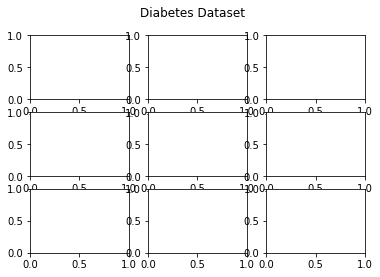

In [14]:
import matplotlib.pyplot as plt

# Don't plot the sex data
features = data['feature_names']
# features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(data['data'][feature], data['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()